# MSDS 422 Assignment 2 - Evaluating Regression Models
by Ruchi Kumar

#### Description: Week 2 Assignment MSDS 422 - Practical Machine Learning

#### Topic: Compete in House Prices on Kaggle

#### Data Source:  Downloaded from https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

#### Table of contents:

System and Data Setup

Data Preparation, EDA and Visualization

Modeling Methods

Evaluate Models



## System and Data Setup

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from statistics import mean 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import ShuffleSplit
from sklearn import tree
from sklearn.ensemble import VotingRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
%matplotlib inline


In [3]:
# Source data is from: 

train_file = pd.read_csv("train.csv")
test_file = pd.read_csv("test.csv")

In [4]:
# Copy the data

train = train_file.copy()
test = test_file.copy()

## Data Preparation, EDA and Visualization

In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

In [7]:
# Confirm test file does not have SalePrice column, only has x values

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [8]:
# Transpose for easier viewing

train.head().transpose()

,0,1,2,3,4
Id,1,2,3,4,5
MSSubClass,60,20,60,70,60
MSZoning,RL,RL,RL,RL,RL
LotFrontage,65,80,68,60,84
LotArea,8450,9600,11250,9550,14260
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [9]:
# In the training data, the columns Alley, FireplaceQu, PoolQC, Fence and MiscFeature are missing many values.  
# Consider dropping those columns?

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
# Highest Outlier Categories seem to be: LotArea, MasVnrArea, BsmtFinSF1, TotalBsmtSF, 1stFlrSF, GrLivArea
# Need to look at boxplots for those features

train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


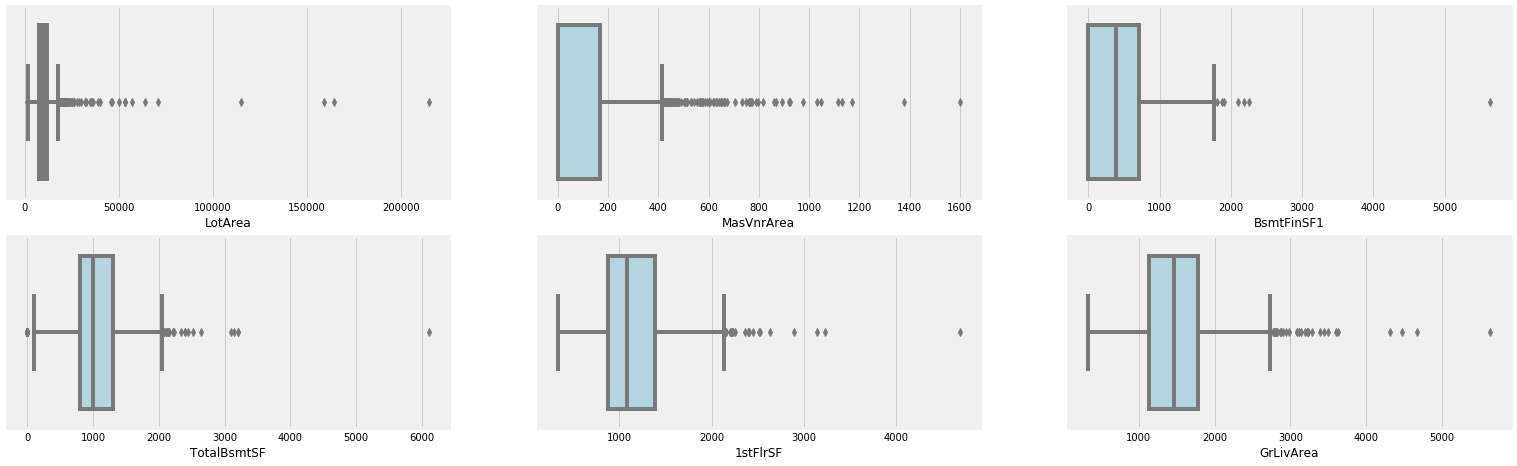

In [11]:
# Boxplot for numeric variables with outliers

plt.figure(figsize=(24, 12))
plt.subplot(3,3,1)
sns.boxplot(train.LotArea, color= "lightblue")
plt.subplot(3,3,2)
sns.boxplot(train.MasVnrArea, color="lightblue")
plt.subplot(3,3,3)
sns.boxplot(train.BsmtFinSF1, color="lightblue")
plt.subplot(3,3,4)
sns.boxplot(train.TotalBsmtSF, color="lightblue")
plt.subplot(3,3,5)
sns.boxplot(train['1stFlrSF'], color="lightblue")
plt.subplot(3,3,6)
sns.boxplot(train.GrLivArea, color="lightblue")
plt.show()

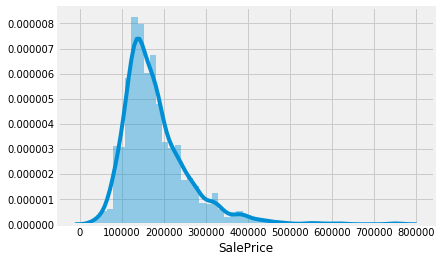

In [12]:
# Sale Price looks vaguely normally distributed (use log transformation)

sns.distplot(train['SalePrice'])

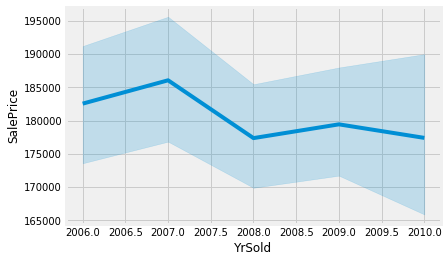

In [13]:
# Look at Sale Price over time
sns.lineplot(x = train['YrSold'], y = train['SalePrice'])

In [14]:
# Identify columns with Missing Values and the percentage missing

missing_values = train.isnull().sum()/len(train)
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)
missing_values

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtExposure    0.026027
BsmtFinType2    0.026027
GarageCond      0.055479
GarageQual      0.055479
GarageFinish    0.055479
GarageType      0.055479
GarageYrBlt     0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
Fence           0.807534
Alley           0.937671
MiscFeature     0.963014
PoolQC          0.995205
dtype: float64

In [15]:
# Drop Columns Missing > 10% percent of values
# (Add inplace = True to finalize)

train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace = True)
test.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage'], axis=1, inplace = True)


In [16]:
# Create a feature called TotalSF

train["TotalSF"] = train["TotalBsmtSF"] + train["1stFlrSF"] + train["2ndFlrSF"]
test["TotalSF"] = test["TotalBsmtSF"] + test["1stFlrSF"] + test["2ndFlrSF"]

In [17]:
# Remove the individual floor features to avoid collinearity

train.drop(['TotalBsmtSF'], axis=1, inplace = True)
train.drop(['1stFlrSF'], axis=1, inplace = True)
train.drop(['2ndFlrSF'], axis=1, inplace = True)
test.drop(['TotalBsmtSF'], axis=1, inplace = True)
test.drop(['1stFlrSF'], axis=1, inplace = True)
test.drop(['2ndFlrSF'], axis=1, inplace = True)

In [18]:
# Save ID Columns for submission to Kaggle

train_ID = train[['Id']]
test_ID = test[['Id']]

In [19]:
# Drop ID Column
# (Add inplace = True to finalize)

train.drop(['Id'], axis=1, inplace = True)
test.drop(['Id'], axis=1, inplace = True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1452 non-null object
MasVnrArea       1452 non

In [21]:
# Separate numerical and categorical variables in this dataset
numeric_train = train.select_dtypes(include=[np.number])
categorical_train = train.select_dtypes(exclude=[np.number])


In [22]:
numeric_train.shape

(1460, 34)

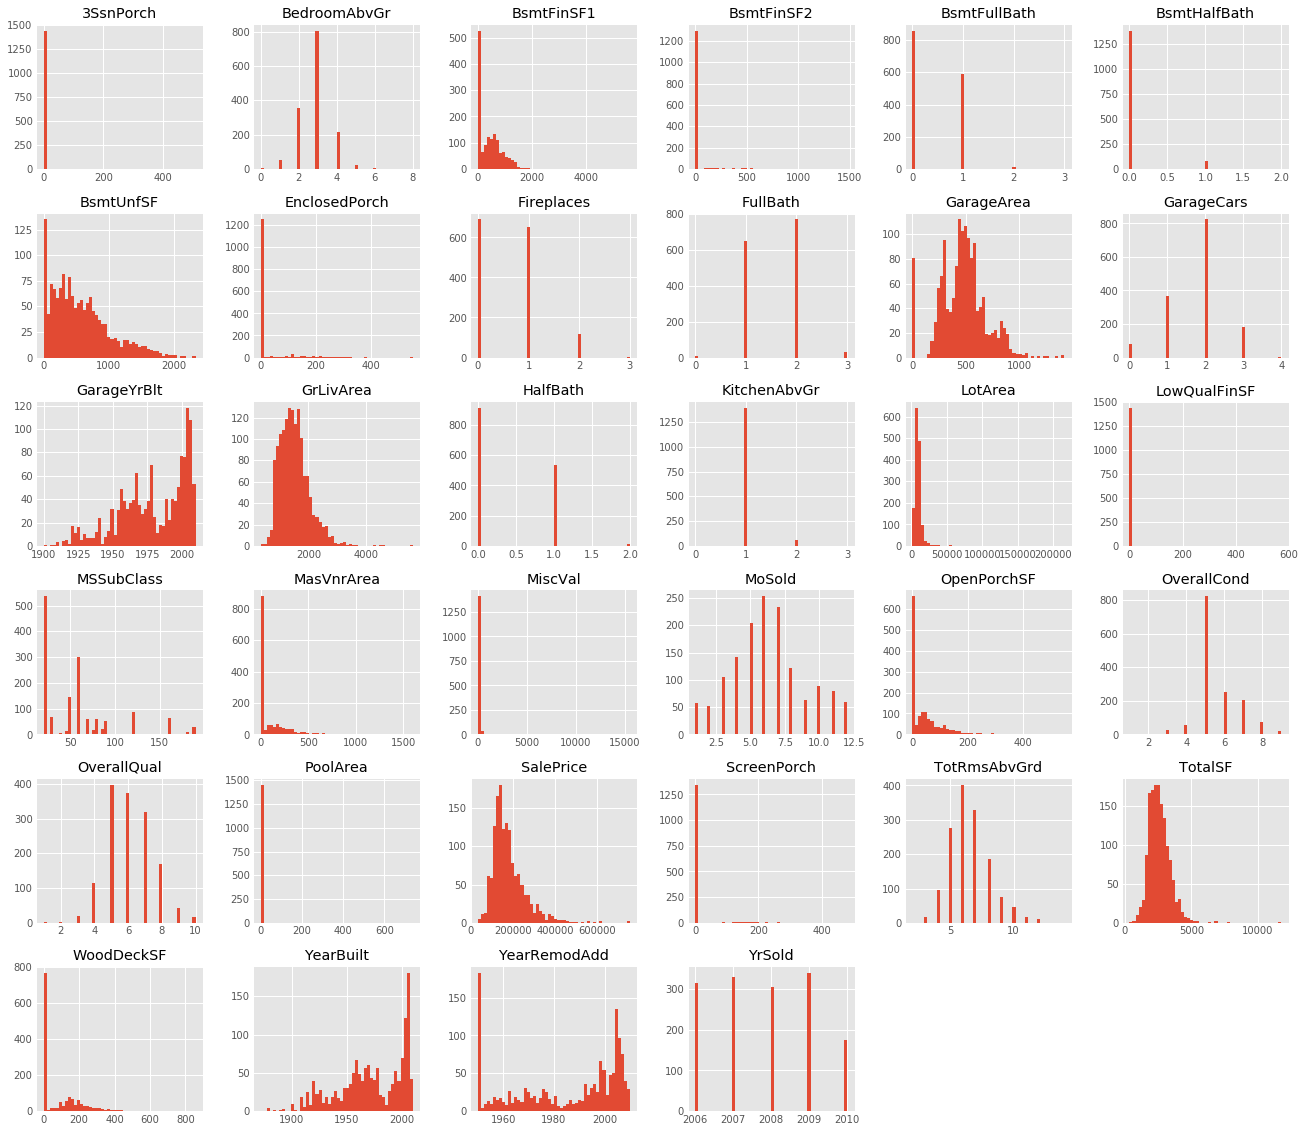

In [23]:
# Visual of Numeric Data
plt.style.use("ggplot")
numeric_train.hist(bins=50, figsize=(20,20))
plt.show()

In [24]:
corr = numeric_train.corr()
corr

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
MSSubClass,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284,-0.082225
LotArea,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843,0.307234
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.668155
OverallCond,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856,-0.143814
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.347133
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.342873
MasVnrArea,0.022936,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493,0.448528
BsmtFinSF1,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,...,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420,0.415843
BsmtFinSF2,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,...,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378,0.048916
BsmtUnfSF,-0.140759,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,...,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479,0.373733


In [25]:
# Correlation of numeric columns
# Can see which features are most highly correlated with Sale Price

sorted_corr = corr.sort_values(by=['SalePrice'], ascending=False)
sorted_corr

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
SalePrice,-0.084284,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,-0.011378,0.214479,...,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000,0.782260
OverallQual,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982,0.668155
TotalSF,-0.082225,0.307234,0.668155,-0.143814,0.347133,0.342873,0.448528,0.415843,0.048916,0.373733,...,0.342108,-0.048761,0.033414,0.108437,0.172466,-0.011186,0.040485,-0.029638,0.782260,1.000000
GrLivArea,0.074853,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,-0.009640,0.240257,...,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624,0.874373
GarageCars,-0.040110,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,-0.038264,0.214175,...,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409,0.536413
GarageArea,-0.098672,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,-0.018227,0.183303,...,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431,0.563747
FullBath,0.131608,0.126031,0.550600,-0.194149,0.468271,0.439046,0.276833,0.058543,-0.076444,0.288886,...,0.259977,-0.115093,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,0.560664,0.575762
TotRmsAbvGrd,0.040380,0.190015,0.427452,-0.057583,0.095589,0.191740,0.280682,0.044316,-0.035227,0.250647,...,0.234192,0.004151,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,0.533723,0.672596
YearBuilt,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897,0.347133
YearRemodAdd,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101,0.342873


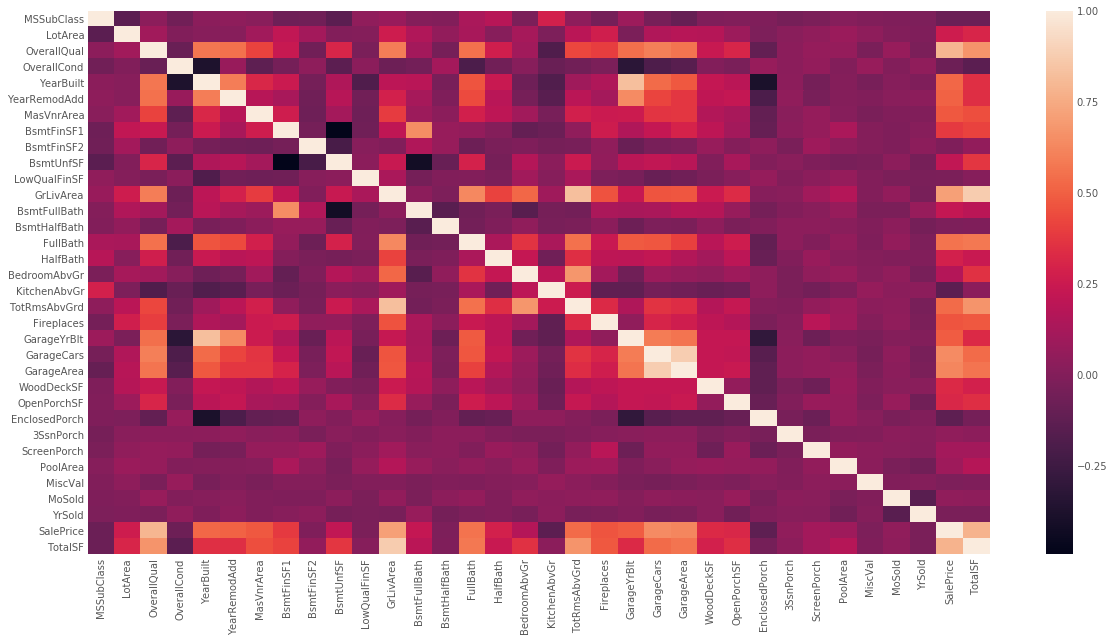

In [26]:
# Normally, would want to eliminate or combine features that are highly correlated, to avoid multicollinearity

fig, ax = plt.subplots(figsize = (18,10))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [27]:
categorical_train.shape

(1460, 38)

In [28]:
# Impute numerical values with mean values in training set

numeric_train_mean_imputed = numeric_train.fillna(numeric_train.mean())

In [29]:
numeric_train_mean_imputed.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,TotalSF
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,61,0,0,0,0,0,2,2008,208500,2566
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,0,0,5,2007,181500,2524
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,42,0,0,0,0,0,9,2008,223500,2706
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,35,272,0,0,0,0,2,2006,140000,2473
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,84,0,0,0,0,0,12,2008,250000,3343


In [30]:
# Confirmed, no null values remain

numeric_train_mean_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
MSSubClass       1460 non-null int64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageYrBlt      1460 non-null float64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
O

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 71 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1443 non-null object
MasVnrArea       1444 non

## Modeling Methods

### Linear Regression (Only working with Numerical columns)

In [32]:
# Take Log of Sale Price Column for normal distribution

log_SalePrice = np.log(numeric_train_mean_imputed.SalePrice)

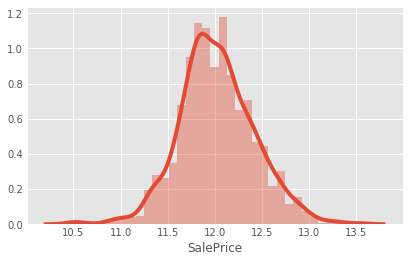

In [33]:
# Visual of Log Transformed Sale Price

sns.distplot(log_SalePrice)

In [34]:
# numeric_train_mean_imputed is my numeric training file.  

# Use log_SalePrice these for training file labels
x_numeric_train_mean_imputed = numeric_train_mean_imputed.drop(['SalePrice'], axis=1) # Use these for training


In [35]:
# Quick look at X values from training file

x_numeric_train_mean_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 33 columns):
MSSubClass       1460 non-null int64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
Fireplaces       1460 non-null int64
GarageYrBlt      1460 non-null float64
GarageCars       1460 non-null int64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
O

In [36]:
# Quick look at labels from training file

log_SalePrice.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [37]:
# Handle NA Values for Test Set by forward filling

test = test.fillna(test.ffill())

In [38]:
# Need X values from test file: Use only numeric columns from test file

numeric_test = test.select_dtypes(include=[np.number])

In [39]:
numeric_test.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,9819.161069,6.078821,5.553804,1971.357779,1983.662783,101.804661,438.949280,52.583276,554.255655,...,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705,2528.509938
std,42.746880,4955.517327,1.436812,1.113740,30.390071,21.130467,178.567416,455.215634,176.698671,437.113082,...,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740,787.044703
min,20.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,612.000000
25%,20.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,1985.000000
50%,50.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.000000,0.000000,460.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,2428.000000
75%,70.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,165.500000,752.000000,0.000000,797.500000,...,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,2976.000000
max,190.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,...,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,10190.000000


In [40]:
# Scale Training and Test Feature files Numeric Columns (not Sale Price)

from sklearn import preprocessing

x = x_numeric_train_mean_imputed.values #returns a numpy array
std_scaler = preprocessing.StandardScaler()
x_scaled = std_scaler.fit_transform(x)
x_numeric_train_mean_imputed_scaled = pd.DataFrame(x_scaled)

x_test = numeric_test #returns a numpy array
std_scaler = preprocessing.StandardScaler()
x_test_scaled = std_scaler.fit_transform(x_test)
numeric_test_scaled = pd.DataFrame(x_test_scaled)


In [41]:
x_numeric_train_mean_imputed_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,-0.944591,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,-0.001277
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,-0.641228,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,-0.052407
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,-0.301643,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.169157
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,-0.061670,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.114493
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,-0.174865,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.944631


In [42]:
# Rename variables for ease of use in Models:

X = x_numeric_train_mean_imputed_scaled #numeric training feature without SalePrice (training features)
y = log_SalePrice #training Sale Price column only (LABELS)

final_test = numeric_test_scaled

In [43]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-1.504124e-16,-4.202783e-17,-7.680310e-17,3.692632e-16,1.032983e-15,4.518912e-15,1.630355e-16,1.505645e-17,1.653168e-16,-7.376139e-17,...,2.190029e-16,3.357284e-17,1.379034e-16,-4.005738e-16,1.199193e-16,-7.945889e-16,2.409602e-16,-6.395189e-17,3.566101e-14,-2.424431e-16
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-8.725628e-01,-9.237292e-01,-3.688413e+00,-4.112970e+00,-3.287824e+00,-1.689368e+00,-5.744105e-01,-9.730182e-01,-2.886528e-01,-1.284176e+00,...,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.969111e+00,-1.367655e+00,-2.718479e+00
25%,-8.725628e-01,-2.969908e-01,-7.951515e-01,-5.171998e-01,-5.719226e-01,-8.656586e-01,-5.744105e-01,-9.730182e-01,-2.886528e-01,-7.793259e-01,...,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-4.891101e-01,-6.144386e-01,-6.787512e-01
50%,-1.631095e-01,-1.040633e-01,-7.183611e-02,-5.171998e-01,5.737148e-02,4.425864e-01,-5.744105e-01,-1.319022e-01,-2.886528e-01,-2.031633e-01,...,-7.521758e-01,-3.270298e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.191097e-01,1.387775e-01,-1.132760e-01
75%,3.098594e-01,1.087080e-01,6.514792e-01,3.817427e-01,9.516316e-01,9.271216e-01,3.355252e-01,5.891327e-01,-2.886528e-01,5.450557e-01,...,5.886506e-01,3.221901e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,6.208910e-01,8.919936e-01,5.319380e-01
max,3.147673e+00,2.051827e+01,2.821425e+00,3.078570e+00,1.282839e+00,1.217843e+00,8.289499e+00,1.140575e+01,8.851638e+00,4.004295e+00,...,6.087635e+00,7.554198e+00,8.675309e+00,1.721723e+01,8.341462e+00,1.830618e+01,3.116527e+01,2.100892e+00,1.645210e+00,1.118162e+01


In [44]:
final_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,...,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03,1.459000e+03
mean,7.134362e-17,1.256658e-16,-8.506637e-16,-2.868774e-17,-1.780618e-16,2.053494e-15,-5.339001e-17,-3.193698e-16,-1.231975e-16,-1.369706e-18,...,-1.459498e-16,4.943546e-17,4.103031e-16,-2.900924e-16,3.972148e-16,3.969580e-16,1.106894e-16,3.815393e-16,-8.993461e-14,3.675378e-17
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-8.747108e-01,-1.685399e+00,-3.535998e+00,-4.090153e+00,-3.040119e+00,-1.593638e+00,-5.703144e-01,-9.645973e-01,-2.976893e-01,-1.268426e+00,...,-7.296318e-01,-7.016277e-01,-3.607383e-01,-8.882665e-02,-3.015430e-01,-5.722694e-02,-9.224354e-02,-1.875504e+00,-1.359958e+00,-2.435906e+00
25%,-8.747108e-01,-4.901594e-01,-7.511012e-01,-4.974178e-01,-6.042787e-01,-9.782021e-01,-5.703144e-01,-9.645973e-01,-2.976893e-01,-7.660957e-01,...,-7.296318e-01,-7.016277e-01,-3.607383e-01,-8.882665e-02,-3.015430e-01,-5.722694e-02,-9.224354e-02,-7.731699e-01,-5.914922e-01,-6.908074e-01
50%,-1.726646e-01,-8.481559e-02,-5.487716e-02,-4.974178e-01,5.405660e-02,3.946944e-01,-5.703144e-01,-1.954673e-01,-2.976893e-01,-2.157061e-01,...,-7.296318e-01,-2.950042e-01,-3.607383e-01,-8.882665e-02,-3.015430e-01,-5.722694e-02,-9.224354e-02,-3.828073e-02,1.769736e-01,-1.277493e-01
75%,2.953663e-01,3.428343e-01,6.413469e-01,4.007660e-01,9.757261e-01,9.627894e-01,3.568242e-01,6.879334e-01,-2.976893e-01,5.566700e-01,...,5.859403e-01,3.439758e-01,-3.607383e-01,-8.882665e-02,-3.015430e-01,-5.722694e-02,-9.224354e-02,6.966085e-01,9.454395e-01,5.687650e-01
max,3.103551e+00,9.443389e+00,2.730019e+00,3.095317e+00,1.271977e+00,1.246837e+00,6.656325e+00,7.847435e+00,8.341443e+00,3.629011e+00,...,1.042141e+01,1.007390e+01,1.469773e+01,1.773215e+01,9.876869e+00,2.618846e+01,2.686660e+01,2.166387e+00,1.713905e+00,9.737842e+00


In [45]:
# Split training file into train/test set:
from sklearn.model_selection import train_test_split

#Assign variables to capture train test split outcome:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size = 0.1, random_state = 100)

In [46]:
# Instatiate
lin_reg = LinearRegression()

# Fit Model to Training Data, learn coefficients
lin_reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
1436,-0.872563,-0.152020,-1.518467,0.381743,-0.008870,-0.671845,-0.574410,0.378031,-0.288653,-0.722728,...,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,-1.021445
57,0.073375,0.113068,0.651479,-0.517200,1.084115,0.927122,-0.574410,-0.973018,-0.288653,0.662778,...,-0.752176,0.352386,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-1.367655,0.015767
780,-0.872563,-0.264769,0.651479,-0.517200,0.786028,0.539493,-0.363893,-0.973018,-0.288653,1.516269,...,1.003668,-0.387422,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,-0.614439,-0.093798
382,0.073375,-0.127465,0.651479,-0.517200,1.150356,1.024029,-0.574410,-0.973018,-0.288653,0.841627,...,0.397104,0.095718,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,-0.614439,0.205679
1170,0.546344,-0.063824,-0.071836,0.381743,0.189854,-0.381123,-0.574410,0.171865,-0.288653,0.015303,...,0.867989,-0.704483,-0.359325,-0.116339,-0.270208,14.272672,-0.087688,0.250891,0.138777,-0.429796


In [48]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,-0.109658,0.094831,-0.141195,-0.030786,0.017445,-0.118612,-0.069529,-0.032785,0.122355,-0.130641,...,0.071354,-0.090527,-0.185901,0.022716,0.134693,0.118045,-0.030927,-0.005068,0.045915,-0.165924
std,0.900836,1.393692,1.020552,1.077318,0.893061,0.979404,0.772075,0.923697,1.098908,0.931811,...,0.964614,0.934443,0.641634,0.977281,1.335474,1.592149,0.374810,0.964417,0.996472,0.947728
min,-0.872563,-0.885645,-3.688413,-3.214027,-2.625409,-1.689368,-0.574410,-0.973018,-0.288653,-1.284176,...,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.969111,-1.367655,-2.718479
25%,-0.872563,-0.275944,-0.795151,-0.517200,-0.439440,-0.950452,-0.574410,-0.973018,-0.288653,-0.885163,...,-0.752176,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,-0.805359
50%,-0.163109,-0.124709,-0.071836,-0.517200,0.024251,-0.138856,-0.574410,-0.182347,-0.288653,-0.297115,...,-0.249366,-0.553502,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.119110,0.138777,-0.332405
75%,0.073375,0.135342,0.651479,0.381743,0.910231,0.878668,0.361840,0.642319,-0.288653,0.422239,...,0.724329,0.137238,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,0.891994,0.347200
max,2.911188,14.881285,2.821425,3.078570,1.249718,1.217843,2.766175,2.356354,6.699887,2.790845,...,3.262322,3.628682,3.765182,8.243356,7.623823,14.272672,3.944952,2.100892,1.645210,2.875404


In [49]:
# Providing Coefficients
lin_reg.intercept_, lin_reg.coef_


(12.025218224981026,
 array([-2.76042063e-02,  1.88270528e-02,  1.12210489e-01,  5.29841015e-02,
         8.95692696e-02,  2.46809436e-02,  1.49989391e-03, -3.46236603e+10,
        -1.22461896e+10, -3.35433357e+10,  3.69111183e+09, -3.98906610e+10,
         3.58538579e-02,  3.84564410e-03,  2.14164120e-02,  7.98238403e-03,
        -3.73093895e-03, -1.17456150e-02,  2.52209012e-02,  3.06052319e-02,
        -4.25316595e-03,  5.11120978e-02,  2.05531199e-03,  1.52098931e-02,
        -1.56294136e-03,  9.76019605e-03,  7.27553403e-03,  1.89994988e-02,
        -1.85162744e-02, -1.41006683e-03,  3.61309589e-04, -1.00242238e-02,
         6.23786014e+10]))

In [50]:
# Predict Sale Price from a segment of training data
y_pred = lin_reg.predict(X_test)

In [51]:
# Predicted Sale Price
y_pred

array([11.64236758, 12.19024787, 12.14656565, 12.23916934, 11.66617129,
       12.44237796, 12.29979823, 12.598613  , 11.65081332, 12.11783717,
       12.13581393, 12.26007769, 11.93823168, 12.22007678, 11.5700104 ,
       11.77919314, 12.13496134, 11.63559268, 11.71338961, 11.76848147,
       11.88346431, 11.58611605, 11.77618716, 11.75342867, 12.15893672,
       11.94126437, 10.80317233, 11.48569033, 12.07153056, 11.88348696,
       11.85218737, 12.2426903 , 12.38986132, 11.33678744, 11.75645754,
       11.31522677, 11.76787875, 11.20301364, 11.81586001, 11.71783755,
       12.71830294, 12.28177569, 11.61035464, 11.36989901, 11.95716021,
       11.18361971, 12.52357028, 11.85103152, 11.86889956, 11.63178561,
       12.38062594, 11.54003451, 12.81852267, 12.39115069, 12.06727145,
       11.42386172, 11.01763461, 12.06617091, 11.70995257, 12.89594576,
       11.85634158, 12.32598422, 11.96772311, 11.98932192, 12.24322817,
       12.40371249, 11.62891696, 11.73664401, 12.19369052, 11.81

In [54]:
print("Training set score: {:.2f}".format(lin_reg.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lin_reg.score(X_test,y_test)))

Training set score: 0.87
Test set score: 0.89


In [186]:
# Begin a dataframe to collect results

perf_summary = pd.DataFrame(columns=perf_cols)

In [187]:
# Look at Performance of Model

lin_reg_rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
lin_reg_score = lin_reg.score(X_test,y_test)

col_list = ['Regressor', 'RMSE', 'Score']

lin_reg_perf = pd.DataFrame(['Linear Regression', lin_reg_rmse, lin_reg_score]).T
lin_reg_perf.columns = col_list

# Append to performance dataframe
perf_summary = perf_summary.append(lin_reg_perf)

lin_reg_perf

,Regressor,RMSE,Score
0,Linear Regression,0.144167,0.885888


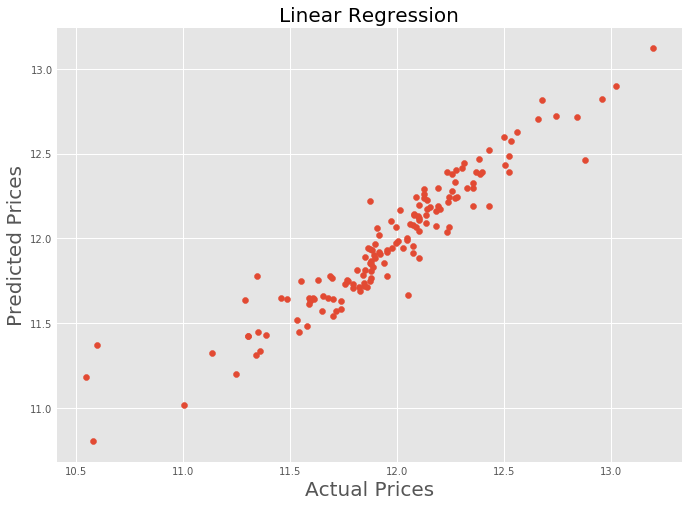

In [55]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred)

plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Linear Regression", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [56]:
#Prepare the cross-validation procedure

cv = KFold(n_splits=5, random_state=1, shuffle=True)

#Evaluate model
scores = cross_val_score(lin_reg, X, y, scoring='r2', cv=cv, n_jobs=-1)

#Report performance
print('R2 Score: %.5f' % (mean(scores)))

R2 Score: 0.84665


### Regression Method 2 Ridge


In [57]:
#Ridge Regression Model

rrm_mv = Ridge(alpha = .142, normalize = True)

# Fit data on to the model
rrm_mv.fit(X_train, y_train)

# Predict
y_predicted_rrm = rrm_mv.predict(X_test)

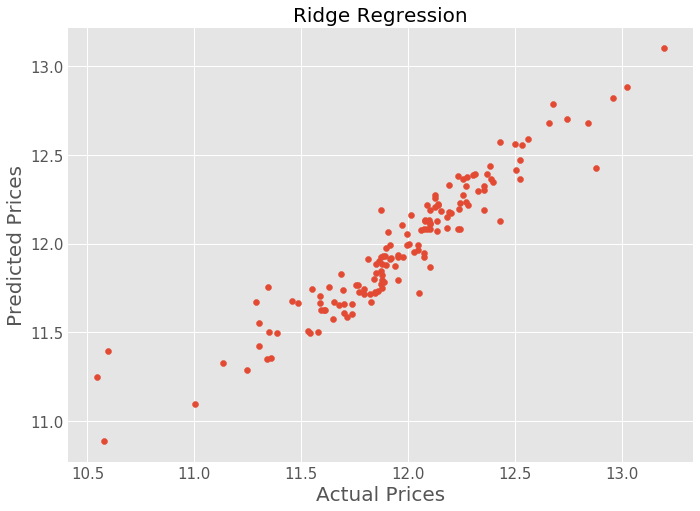

In [58]:
# Plot the predicted values generated from the model against the actual values of the test set
# Predictions seem to be most off in the lower end of the price range

plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predicted_rrm)

plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Ridge Regression", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [188]:
# Look at Performance of Model

rrm_mv_rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_predicted_rrm)))
rrm_mv_score = rrm_mv.score(X_test,y_test)

col_list = ['Regressor', 'RMSE', 'Score']

rrm_mv_perf = pd.DataFrame(['Ridge', rrm_mv_rmse, rrm_mv_score]).T
rrm_mv_perf.columns = col_list

# Append to performance dataframe
perf_summary = perf_summary.append(rrm_mv_perf)

rrm_mv_perf

,Regressor,RMSE,Score
0,Ridge,0.14929,0.877633


In [61]:
# Predict Sale Price of Kaggle Test File

rrm_y_pred_test = rrm_mv.predict(final_test)

In [62]:
rrm_y_pred_test

array([11.70868306, 11.8836218 , 12.08276714, ..., 12.14367252,
       11.65082572, 12.40205043])

In [63]:
# Need to undo log transformation

rrm_y_pred_test_log = np.exp(rrm_y_pred_test)

In [64]:
rrm_y_pred_test_log

array([121623.2051353 , 144874.3073027 , 176798.71067713, ...,
       187901.37809304, 114786.10472795, 243299.97711943])

In [65]:
# Prepare Data for Submission

my_submission_rrm1 = pd.DataFrame({'Id': test_ID.Id, 'SalePrice': rrm_y_pred_test_log.flatten()})

my_submission_rrm1.to_csv('rrm1_submission.csv', index=False)

### Regression Method 3.5 - Ridge with Cross Validation

In [66]:
# Try Ridge with Cross Validation - plug this alpha back into Ridge Regression

ridge = Ridge(normalize = True)
coefs = []
alphas = 10**np.linspace(10,-2,100)*0.5

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.14240179342179024

### Regression Method 3 - Lasso

In [67]:
print(X.shape)

(1460, 33)


In [68]:
print(y.shape)

(1460,)


In [69]:
#Lasso Regression
larm = Lasso(alpha=0.001)

# Fit data on to the model
larm.fit(X_train, y_train)

# Predict
y_predicted_larm = larm.predict(X_test)

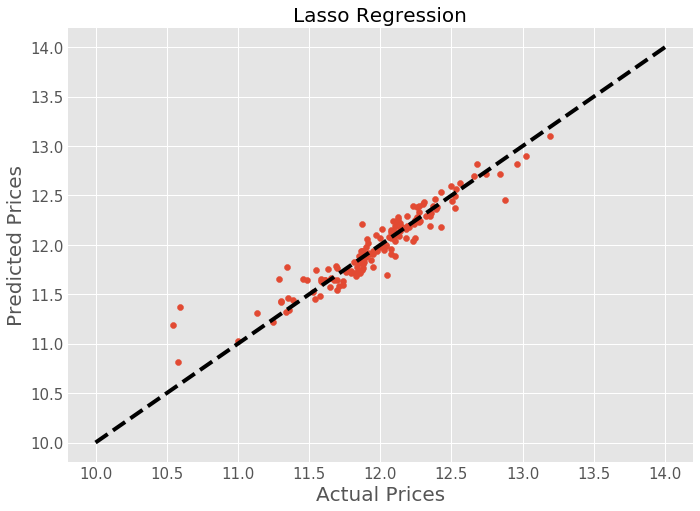

In [70]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predicted_larm)
plt.plot([10, 14], [10, 14], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Lasso Regression", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [190]:
print("Number of features used: {}".format(np.sum(larm.coef_ !=0)))

Number of features used: 28


In [189]:
# Look at Performance of Model

larm_rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_predicted_larm)))
larm_score = larm.score(X_test,y_test)

col_list = ['Regressor', 'RMSE', 'Score']

larm_perf = pd.DataFrame(['Lasso', larm_rmse, larm_score]).T
larm_perf.columns = col_list

# Append to performance dataframe
perf_summary = perf_summary.append(larm_perf)

larm_perf

,Regressor,RMSE,Score
0,Lasso,0.144513,0.88534


In [73]:
# Predict Sale Price of Kaggle Test File

larm_y_pred_test = larm.predict(final_test)

In [74]:
larm_y_pred_test

array([11.67614173, 11.88912242, 12.05923871, ..., 12.12918872,
       11.65958961, 12.40051246])

In [75]:
# Need to undo log transformation

larm_y_pred_test_log = np.exp(larm_y_pred_test)

In [76]:
larm_y_pred_test_log

array([117729.12680176, 145673.40179692, 172687.47084563, ...,
       185199.4666836 , 115796.49879118, 242926.07522334])

In [77]:
# Prepare Data for Submission

my_submission_larm1 = pd.DataFrame({'Id': test_ID.Id, 'SalePrice': larm_y_pred_test_log.flatten()})

my_submission_larm1.to_csv('larm1_submission.csv', index=False)

### Regression Method 4 - ElasticNet

In [78]:
#Elastic Net
enrm_log = ElasticNet(alpha=0.1, l1_ratio=0.01)

# Fit data on to the model
enrm_log.fit(X_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.01,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
# Predict
y_predicted_enrm = enrm_log.predict(X_test)

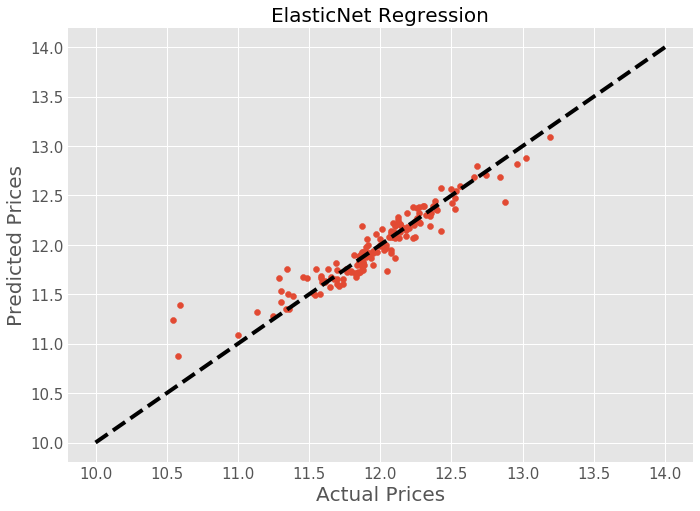

In [80]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predicted_enrm)
plt.plot([10, 14], [10, 14], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("ElasticNet Regression", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [191]:
print("Number of features used: {}".format(np.sum(enrm_log.coef_ !=0)))

Number of features used: 31


In [192]:
# Look at Performance of Model

enrm_log_rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_predicted_enrm)))
enrm_log_score = enrm_log.score(X_test,y_test)

col_list = ['Regressor', 'RMSE', 'Score']

enrm_log_perf = pd.DataFrame(['Elastic Net', enrm_log_rmse, enrm_log_score]).T
enrm_log_perf.columns = col_list

# Append to performance dataframe
perf_summary = perf_summary.append(enrm_log_perf)

enrm_log_perf

,Regressor,RMSE,Score
0,Elastic Net,0.147874,0.879944


In [83]:
# Predict Sale Price of Kaggle Test File

en_y_pred_test = larm.predict(final_test)

In [84]:
# Predict Sale Price of Kaggle Test File

en_y_pred_test = larm.predict(final_test)

In [85]:
# Need to undo log transformation

en_y_pred_test_log = np.exp(en_y_pred_test)

In [86]:
en_y_pred_test_log

array([117729.12680176, 145673.40179692, 172687.47084563, ...,
       185199.4666836 , 115796.49879118, 242926.07522334])

In [87]:
# Prepare Data for Submission

my_submission_en3 = pd.DataFrame({'Id': test_ID.Id, 'SalePrice': en_y_pred_test_log.flatten()})

my_submission_en3.to_csv('en3_submission.csv', index=False)

In [79]:
# Try ElasticNet with grid search

# define model
#model = ElasticNet()

# define model evaluation method
#cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

# define grid
#grid = dict()
#grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
#grid['l1_ratio'] = np.arange(0, 1, 0.01)

# define search
#search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
#results = search.fit(X, y)

# summarize
#print('MAE: %.3f' % results.best_score_)
#print('Config: %s' % results.best_params_)


## Trees

### Decision Tree

In [88]:
# Fit a Decision Tree Regressor

tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)


DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [89]:
# Predict
y_predicted_tree = tree_reg1.predict(X_test)

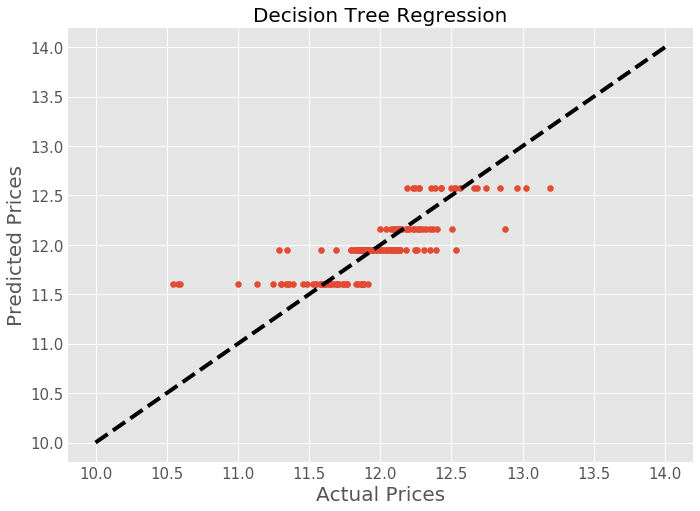

In [90]:
# Visualize 

plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predicted_tree)
plt.plot([10, 14], [10, 14], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Decision Tree Regression", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [193]:
# Look at Performance of Model

tree_reg1_rmse = (np.sqrt(metrics.mean_squared_error(y_test, y_predicted_tree)))
tree_reg1_score = tree_reg1.score(X_test,y_test)

col_list = ['Regressor', 'RMSE', 'Score']

tree_reg1_perf = pd.DataFrame(['Decision Tree', tree_reg1_rmse, tree_reg1_score]).T
tree_reg1_perf.columns = col_list

# Append to performance dataframe
perf_summary = perf_summary.append(tree_reg1_perf)

tree_reg1_perf

,Regressor,RMSE,Score
0,Decision Tree,0.266066,0.61133


### Random Forest

In [93]:
# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, max_leaf_nodes=16, n_jobs=-1, random_state=0, oob_score=True, bootstrap = True)

In [94]:
# Fit data on to the model
rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=16,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=True, random_state=0, verbose=0,
                      warm_start=False)

In [95]:
# Predict
rf_pred = rf_reg.predict(X_test)

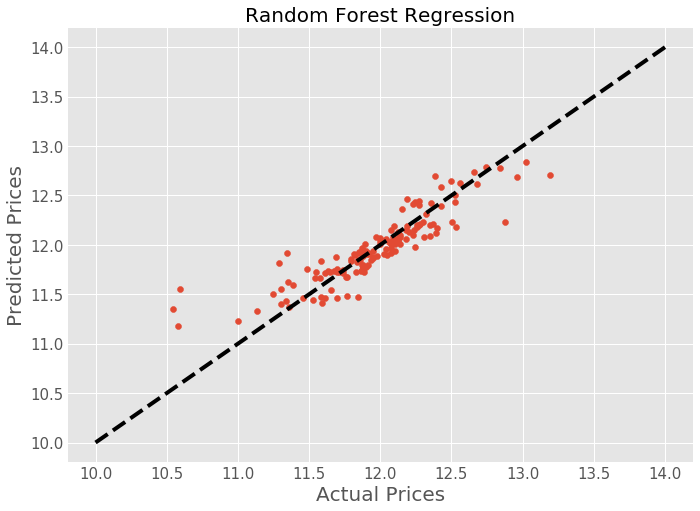

In [96]:
# Visualize

plt.figure(figsize=(10,8))
plt.scatter(y_test,rf_pred)
plt.plot([10, 14], [10, 14], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Random Forest Regression", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [194]:
# Look at Performance of Model

rf_reg_rmse = (np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))
rf_reg_score = rf_reg.score(X_test,y_test)

col_list = ['Regressor', 'RMSE', 'Score']

rf_reg_perf = pd.DataFrame(['Random Forest', rf_reg_rmse, rf_reg_score]).T
rf_reg_perf.columns = col_list

# Append to performance dataframe
perf_summary = perf_summary.append(rf_reg_perf)

rf_reg_perf

,Regressor,RMSE,Score
0,Random Forest,0.19869,0.783252


In [647]:
perf_summary = perf_summary.append(rf_perf)

In [99]:
# Training Set R squared

rf_reg.score(X_train, y_train)

0.8612885500413727

In [100]:
# OOB

print(f'Out-of-bag R-2 score estimate: {rf_reg.oob_score_:>5.3}')

Out-of-bag R-2 score estimate: 0.818


In [101]:
# get importance
importance = rf_reg.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00018
Feature: 1, Score: 0.00256
Feature: 2, Score: 0.51657
Feature: 3, Score: 0.00800
Feature: 4, Score: 0.01553
Feature: 5, Score: 0.00665
Feature: 6, Score: 0.00020
Feature: 7, Score: 0.00435
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00308
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00765
Feature: 12, Score: 0.00023
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00168
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00025
Feature: 17, Score: 0.00131
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00247
Feature: 20, Score: 0.00116
Feature: 21, Score: 0.01060
Feature: 22, Score: 0.01051
Feature: 23, Score: 0.00027
Feature: 24, Score: 0.00325
Feature: 25, Score: 0.00036
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00056
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00033
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.40226


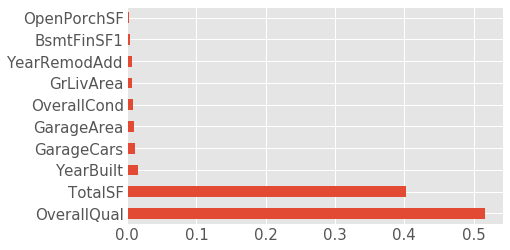

In [103]:
# Visualization of Feature Importance
# Consider re-running regression with only important features!

feat_importances = pd.Series(rf_reg.feature_importances_, index=numeric_test.columns)
feat_importances.nlargest(10).plot(kind='barh')

In [104]:
# Grid Search for best hyperparameters

forest = RandomForestRegressor(random_state = 1)

n_estimators = [10, 30, 50, 80, 120]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  4.1min finished


In [111]:
bestF

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=1,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [5, 8, 15, 25, 30],
   

In [112]:
print(gridF.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=120,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)


In [113]:
# Input optimal parameters

forestOpt = RandomForestRegressor(random_state = 1, max_depth = 25, n_estimators = 120, min_samples_split = 5, min_samples_leaf = 1, oob_score=True, bootstrap = True)
                                   
modelOpt = forestOpt.fit(X_train, y_train)
gs_rf_pred = modelOpt.predict(X_test)

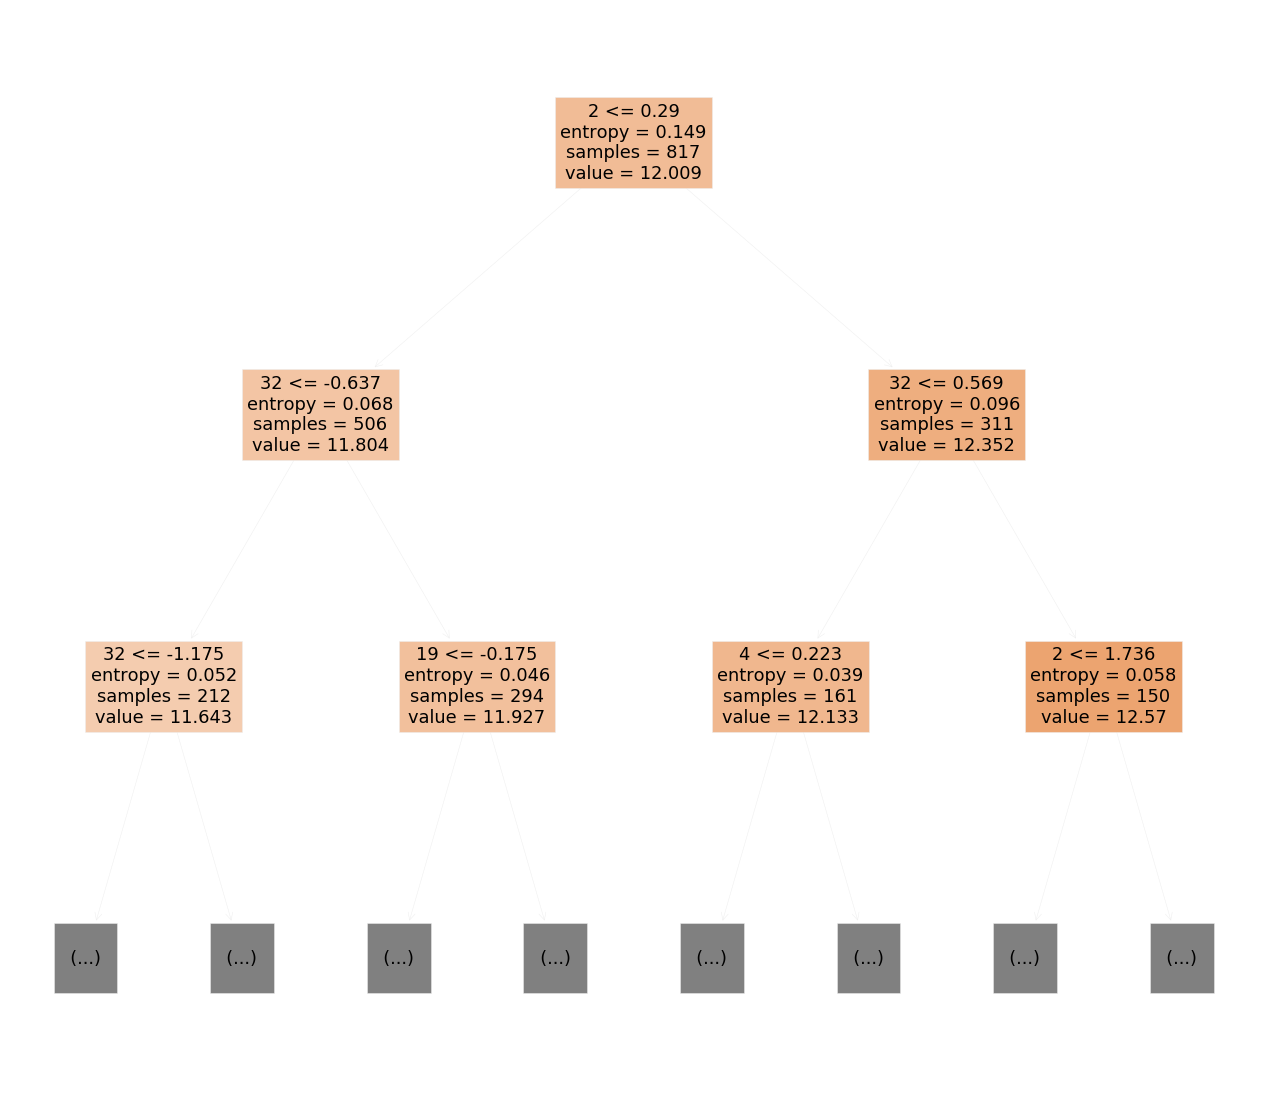

In [114]:
# Just curious to see the tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(forestOpt.estimators_[0], feature_names=X.columns, max_depth = 2, filled=True)

In [115]:
# Depth of first tree

forestOpt.estimators_[0].tree_.max_depth

17

In [195]:
# Look at Performance of Model

forestOpt_rmse = (np.sqrt(metrics.mean_squared_error(y_test, gs_rf_pred)))
forestOpt_score = forestOpt.score(X_test,y_test)

col_list = ['Regressor', 'RMSE', 'Score']

forestOpt_perf = pd.DataFrame(['Random Forest (Grid)', forestOpt_rmse, forestOpt_score]).T
forestOpt_perf.columns = col_list

# Append to performance dataframe
perf_summary = perf_summary.append(forestOpt_perf)

forestOpt_perf

,Regressor,RMSE,Score
0,Random Forest (Grid),0.165157,0.85024


In [118]:
# Predict Sale Price of Kaggle Test File - Optimized Random Forest

rf_pred_test = rf_reg.predict(final_test)

In [119]:
# Need to undo log transformation

rf_pred_test_log = np.exp(rf_pred_test)

In [120]:
rf_pred_test_log

array([125304.73661556, 150595.2954713 , 165270.48120413, ...,
       155448.86163833, 116175.93670191, 245698.10285007])

In [121]:
# Prepare Data for Submission

my_submission_rf1 = pd.DataFrame({'Id': test_ID.Id, 'SalePrice': rf_pred_test_log.flatten()})

my_submission_rf1.to_csv('rf1_submission.csv', index=False)

In [122]:
# Predict Sale Price of Kaggle Test File - Random Forest After Grid Search

gs_rf_pred_test = modelOpt.predict(final_test)

In [123]:
# Need to undo log transformation

gs_rf_pred_test_log = np.exp(gs_rf_pred_test)

In [124]:
gs_rf_pred_test_log

array([126603.97219619, 158708.774504  , 179733.99112236, ...,
       171492.88014343, 111232.27623027, 246845.41771891])

In [125]:
# Prepare Data for Submission

my_submission_gs_rf = pd.DataFrame({'Id': test_ID.Id, 'SalePrice': gs_rf_pred_test_log.flatten()})

my_submission_gs_rf.to_csv('gs_rf_submission.csv', index=False)

### Gradient Boosting

In [212]:
# Fit Gradient Boost
gbrt = GradientBoostingRegressor(max_depth=6, n_estimators=1000, learning_rate=.02, subsample = .2)

gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.02, loss='ls', max_depth=6,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.2, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [213]:
# Predict
gb_pred = gbrt.predict(X_test)

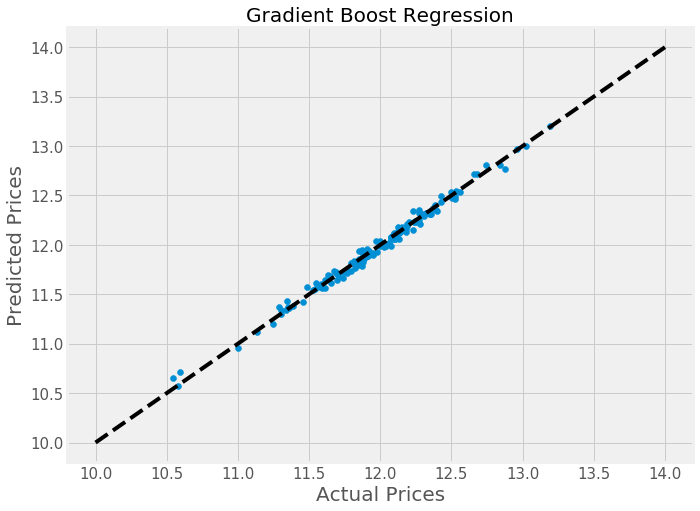

In [214]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,gb_pred)
plt.plot([10, 14], [10, 14], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Gradient Boost Regression", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [215]:
# Look at Performance of Model

gbrt_rmse = (np.sqrt(metrics.mean_squared_error(y_test, gb_pred)))
gbrt_score = gbrt.score(X_test,y_test)

col_list = ['Regressor', 'RMSE', 'Score']

gbrt_perf = pd.DataFrame(['Gradient Boosting', gbrt_rmse, gbrt_score]).T
gbrt_perf.columns = col_list

# Append to performance dataframe
perf_summary = perf_summary.append(gbrt_perf)

gbrt_perf

,Regressor,RMSE,Score
0,Gradient Boosting,0.0434644,0.989628


In [203]:
model = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8] 
                 }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 5, n_jobs=-1)
grid.fit(X_train, y_train)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.02, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=0.2, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.8910760624074185

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.2}



In [216]:
# Predict Sale Price of Kaggle Test File

gb_pred_test = gbrt.predict(final_test)

In [217]:
# Need to undo log transformation

gb_pred_test_log = np.exp(gb_pred_test)

In [218]:
gb_pred_test_log

array([127190.71926884, 164975.83342566, 194803.77414682, ...,
       188917.96896102, 117942.6410822 , 238278.8640309 ])

In [219]:
# Prepare Data for Submission

my_submission_gb1 = pd.DataFrame({'Id': test_ID.Id, 'SalePrice': gb_pred_test_log.flatten()})

my_submission_gb1.to_csv('gb1_submission.csv', index=False)

## Ensemble Methods

### Try VotingRegressor

In [220]:
# Combine three best models: Gradient Boosting, Lasso and Elastic Net

ereg = VotingRegressor([('gb', gbrt), ('lasso', larm), ('en', enrm_log)])
ereg.fit(X, y)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.02,
                                                       loss='ls', max_depth=6,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                  

In [221]:
# Predict
ereg_pred = ereg.predict(X_test)

In [222]:
# Look at Performance of Model

ereg_rmse = (np.sqrt(metrics.mean_squared_error(y_test, ereg_pred)))
ereg_score = ereg.score(X_test,y_test)

col_list = ['Regressor', 'RMSE', 'Score']

ereg_perf = pd.DataFrame(['Ensemble (GB, Lasso, EN)', ereg_rmse, ereg_score]).T
ereg_perf.columns = col_list

# Append to performance dataframe
perf_summary = perf_summary.append(ereg_perf)

ereg_perf

,Regressor,RMSE,Score
0,"Ensemble (GB, Lasso, EN)",0.105812,0.938529


In [223]:
# Predict Sale Price of Kaggle Test File

ereg_pred_test = ereg.predict(final_test)

In [224]:
# Need to undo log transformation

ereg_pred_test_log = np.exp(ereg_pred_test)

In [225]:
ereg_pred_test_log

array([124147.68677761, 153378.75568341, 178196.20974434, ...,
       184454.79571334, 113356.28433873, 239014.03574293])

In [226]:
# Prepare Data for Submission

my_submission_ereg = pd.DataFrame({'Id': test_ID.Id, 'SalePrice': ereg_pred_test_log.flatten()})

my_submission_ereg.to_csv('ereg_submission.csv', index=False)

### Try VotingRegressor with 3 different models

In [227]:
# Combine three best models: Gradient Boosting, Random Forest and Elastic Net

ereg2 = VotingRegressor([('gb', gbrt), ('random forest', forestOpt), ('en', enrm_log)])
ereg2.fit(X, y)

VotingRegressor(estimators=[('gb',
                             GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.02,
                                                       loss='ls', max_depth=6,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                  

In [228]:
# Predict
ereg2_pred = ereg2.predict(X_test)

In [229]:
# Look at Performance of Model

ereg2_rmse = (np.sqrt(metrics.mean_squared_error(y_test, ereg2_pred)))
ereg2_score = ereg2.score(X_test,y_test)

col_list = ['Regressor', 'RMSE', 'Score']

ereg2_perf = pd.DataFrame(['Ensemble (GB, RF, EN)', ereg2_rmse, ereg2_score]).T
ereg2_perf.columns = col_list

# Append to performance dataframe
perf_summary = perf_summary.append(ereg2_perf)

ereg2_perf

,Regressor,RMSE,Score
0,"Ensemble (GB, RF, EN)",0.07924,0.965526


In [230]:
# Predict Sale Price of Kaggle Test File

ereg2_pred_test = ereg2.predict(final_test)

In [231]:
# Need to undo log transformation

ereg2_pred_test_log = np.exp(ereg2_pred_test)

In [234]:
ereg2_pred_test_log

array([127730.70927014, 151832.8942862 , 179591.02360163, ...,
       183439.550589  , 112666.19235512, 239267.79510514])

In [233]:
# Prepare Data for Submission

my_submission_ereg2 = pd.DataFrame({'Id': test_ID.Id, 'SalePrice': ereg2_pred_test_log.flatten()})

my_submission_ereg2.to_csv('ereg2_submission.csv', index=False)

## Evaluate Models

In [199]:
perf_summary.set_index("Regressor", drop=True, inplace=True)

In [200]:
perf_summary.sort_values(by=['RMSE'])

,RMSE,Score
Regressor,,
Gradient Boosting,0.0822549,0.962853
"Ensemble (GB, RF, EN)",0.0950313,0.950417
"Ensemble (GB, Lasso, EN)",0.119758,0.921257
Linear Regression,0.144167,0.885888
Lasso,0.144513,0.88534
Elastic Net,0.147874,0.879944
Ridge,0.14929,0.877633
Random Forest (Grid),0.165157,0.85024
Random Forest,0.19869,0.783252


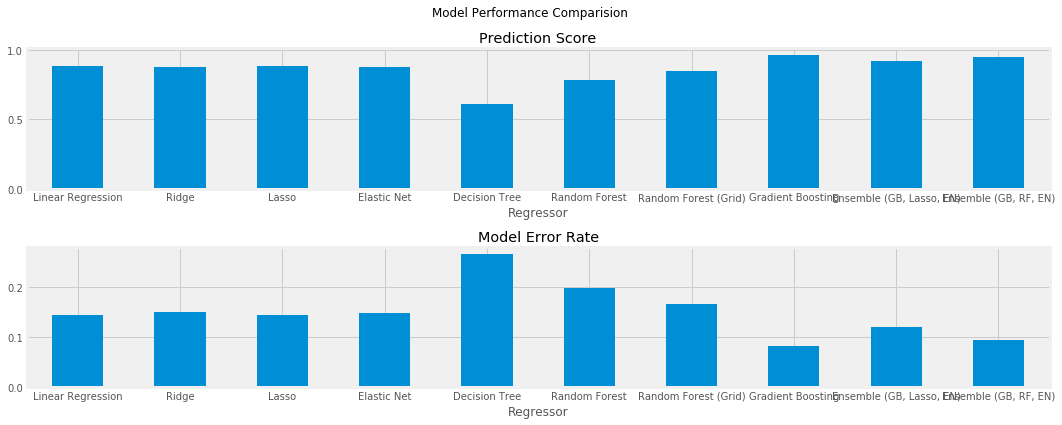

In [201]:
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.suptitle('Model Performance Comparision', y = 1.025)
fig.subplots_adjust(top=4)

plt.subplot(311)
perf_summary['Score'].plot(kind='bar', title ="Prediction Score", figsize=(15, 8), fontsize=10)
plt.xticks(rotation='horizontal')

plt.subplot(312)
perf_summary['RMSE'].plot(kind='bar', title ="Model Error Rate", figsize=(15, 8), fontsize=10)
plt.xticks(rotation='horizontal')

fig.tight_layout()
plt.show()

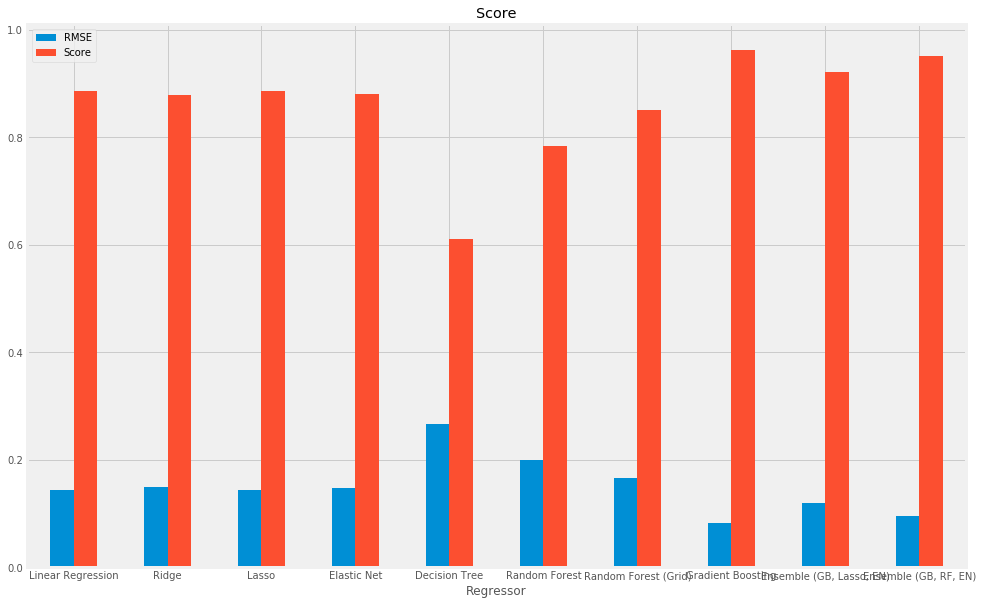

In [202]:
perf_summary.plot(kind='bar', title ="Score", figsize=(15, 10), fontsize=10)
plt.xticks(rotation='horizontal')
plt.show()